# importing the libraries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# importing the data set

In [2]:
data_set=pd.read_csv('50_Startups.csv')
data_set.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# DATA understanding

In [3]:
data_set.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data_set.describe().round(2)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00,50.00,50.00,50.00
mean,73721.62,121344.64,211025.10,112012.64
std,45902.26,28017.80,122290.31,40306.18
min,0.00,51283.14,0.00,14681.40
25%,39936.37,103730.88,129300.13,90138.90
50%,73051.08,122699.80,212716.24,107978.19
75%,101602.80,144842.18,299469.08,139765.98
max,165349.20,182645.56,471784.10,192261.83


In [6]:
data_set.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Assumption check

### linearity check

In [7]:
def linearity_check(x,y,data=data_set):
    sns.lmplot(x,y,data=data_set)
    plt.show()

C:\Users\win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


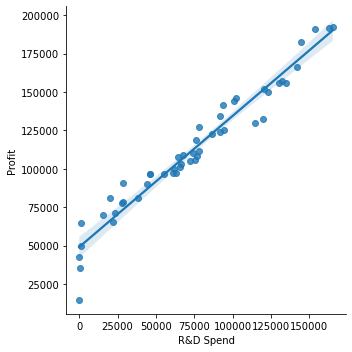

In [8]:
linearity_check("R&D Spend","Profit")

C:\Users\win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


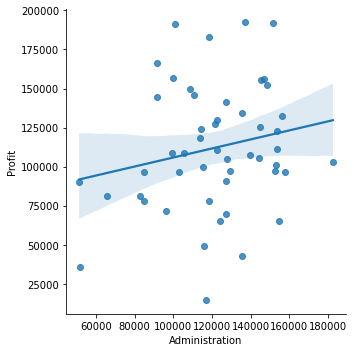

In [9]:
linearity_check('Administration','Profit')

C:\Users\win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


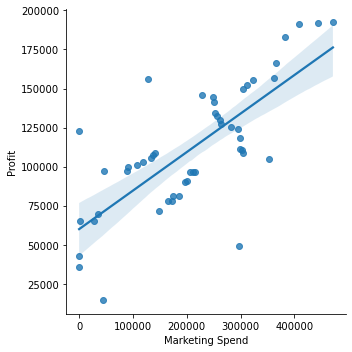

In [10]:
linearity_check("Marketing Spend","Profit")

In [11]:
#linearity check is failed

# Normality test

In [12]:
def normality_check(x,data=data_set):
    sns.kdeplot(x,data=data_set)
    plt.show()
    

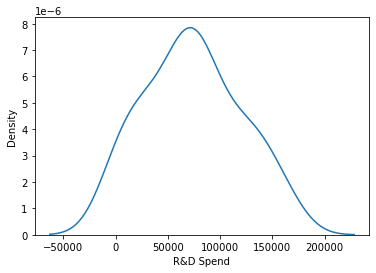

In [13]:
normality_check(data_set['R&D Spend'])

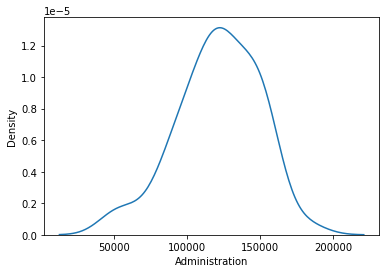

In [14]:
normality_check('Administration')

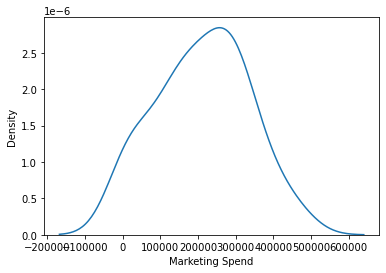

In [15]:
normality_check('Marketing Spend')

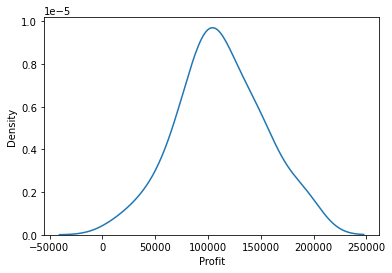

In [16]:
normality_check("Profit")

##### from the above plot we came to know that normality test partially passed

## No AutoRegression

## multi colinearity check

In [17]:
corr_matrix=data_set.corr().round(2)
corr_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.00,0.24,0.72,0.97
Administration,0.24,1.00,-0.03,0.20
Marketing Spend,0.72,-0.03,1.00,0.75
Profit,0.97,0.20,0.75,1.00


<AxesSubplot:>

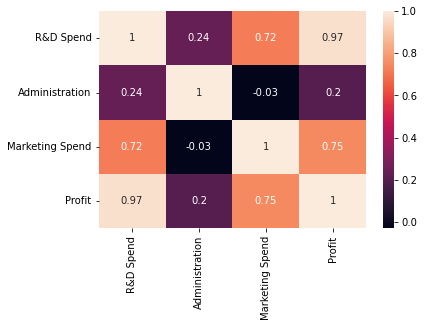

In [18]:
sns.heatmap(data=corr_matrix,annot=True)

# Data preparation

In [19]:
x=data_set.iloc[:,:-1]
y=data_set.iloc[:,4]

In [20]:
#convert the state column into categorical columns by oneHot encoading

In [21]:
states=pd.get_dummies(x['State'],drop_first=True)

In [22]:
#Drop the state column

In [23]:
x=x.drop('State',axis=1)

In [24]:
# concate the dumy variable

In [25]:
x=pd.concat([x,states],axis=1)


In [26]:
x.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [27]:
var=x.iloc[:,:3]

In [28]:
var.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


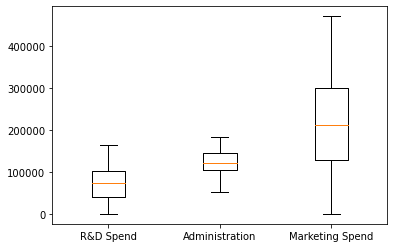

In [29]:
plt.boxplot(var,labels=['R&D Spend','Administration','Marketing Spend'])
plt.show()

In [30]:
# no outliers found

In [31]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [32]:
# splittinig the dataset into training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=34)

# Model building and Model training

In [33]:
# fitting multiple linear regression model to the training set
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()
model_1.fit(x_train,y_train)


LinearRegression()

In [34]:
# predicting the Test results

In [35]:
y_pred=model_1.predict(x_test)
y_pred

array([115487.79119199,  83383.23819546, 185956.45089944, 171389.2779894 ,
       189426.26026156, 158441.40434969,  99854.7586079 , 128351.51082021,
       101280.91290312, 156906.60888133])

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score_m1=r2_score(y_test,y_pred)

In [38]:
r2_score_m1

0.9649795500577617

# test for normality of residuals

In [39]:
error=y_test-y_pred

In [40]:
import statsmodels.api as sm
from  matplotlib import pyplot as plt

C:\Users\win10\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


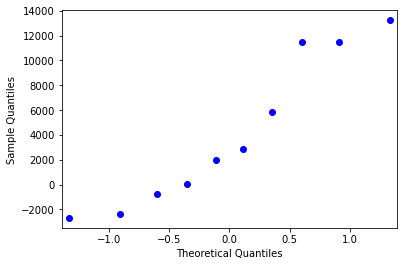

In [41]:
sm.qqplot(data=error)
plt.show()


# Homoscedasticity Check

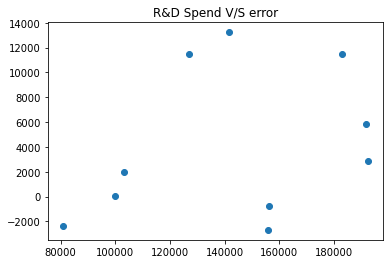

In [42]:
# Homoscedasticity in a model means that the error is constant along the values of the dependent variable
plt.scatter(x=y_test,y=error)
plt.title('R&D Spend V/S error')

plt.show()

In [43]:
# homoscedasticity check is failed

# Zero Residual Mean across the Fitted Line

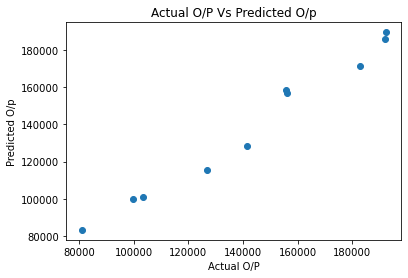

In [44]:
plt.scatter(x=y_test,y=y_pred)
plt.title('Actual O/P Vs Predicted O/p')
plt.xlabel('Actual O/P')
plt.ylabel('Predicted O/p')
plt.show()

In [45]:
#Model building without Marketing Spend because marketing spend has colliniarity problem with R&D Spend

In [46]:
x.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [47]:
x1_train=x_train.loc[:,['R&D Spend','Administration','Florida','New York']]
x1_test=x_test.loc[:,['R&D Spend','Administration','Florida','New York']]

In [48]:
x1_train.head()

,R&D Spend,Administration,Florida,New York
9,123334.88,108679.17,0,0
37,44069.95,51283.14,0,0
48,542.05,51743.15,0,1
47,0.00,135426.92,0,0
22,73994.56,122782.75,1,0


In [49]:
model_2=LinearRegression()
model_2.fit(x1_train,y_train)

LinearRegression()

In [50]:
y_pred2=model_2.predict(x1_test)

In [51]:
y_pred2

array([114217.59559745,  83130.52551996, 183655.76926199, 170059.00861625,
       186708.45090478, 158698.41661432, 102933.4725899 , 129071.80064874,
       102809.55262149, 160385.40734256])

In [52]:
r2_score_m2=r2_score(y_test,y_pred2)

In [53]:
r2_score_m2

0.9563800573476053

In [54]:
r2scores={'model_1':0.9649795500577617,'model_2':0.9563800573476053}

In [55]:
r2_scores=pd.DataFrame(r2scores,index=[1])

In [56]:
r2_scores

,model_1,model_2
1,0.96498,0.95638
